Mount my Google Drive

*   For backup
*   For storage
*   For file transfer






In [49]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir="/content/gdrive/My drive"
base_dir=root_dir+"fastai-v3"

Mounted at /content/gdrive


In [6]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


Import some libraries and modules for performing some operation

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Setup batch size i.e. size of processing image at one time

In [0]:
bs=64


[googles_image_download_module](https://github.com/hardikvasa/google-images-download) to download the images and form a dataset

In [0]:
!pip install google_images_download


     |████████████████████████████████| 911kB 4.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download


THe script downloads images in folder ("your foldername ")
It accepts 4 parameters

1.   Imagename to be searched
2.   How many images to download
3.   The number of iteration to perform this script
4.   The folder name you want to save





In [52]:
!cat a.sh

#!/bin/bash
for ((i=1;i<=$3;i++))
do
googleimagesdownload -k "$1" -s medium -wr '{"time_min":"0'$i'/01/2018","time_max":"0'$i'/30/2018"}' -l "$2" -o /content/downloaded -i train/$4
done


NOw download the images of dog

In [0]:
!bash a.sh "dog" "90" "10" "Dog"


Item no.: 1 --> Item name = dog
Evaluating...
Starting Download...
Completed Image ====> 1.shelter-dog-cropped-1-632x329.jpeg
Completed Image ====> 2.pup-1.png
Completed Image ====> 3.curemain.jpg
Completed Image ====> 4.most-common-dog-bacterial-infections--1024x681.jpg
Completed Image ====> 5.thyroid_disease_in_dogs_hero_.jpg
Completed Image ====> 6.180109-dog-listening-mn-1215_86fd9caebf17bddbf5310597b860cef9.nbcnews-fp-1200-630.jpg
Completed Image ====> 7.pax_memphis_listing.jpg
Completed Image ====> 8.sad-anxious-dog-960x540.jpg
Completed Image ====> 9.zhdfbwvbc2miyqyaryl9.jpg
Completed Image ====> 10.dog-noise-anxiety.jpg
Completed Image ====> 11.white-korean-jindo-800x540.jpg
Completed Image ====> 12.adopt-dogs-foster-800x420.jpg
Completed Image ====> 13.920x920.jpg
Completed Image ====> 14.animal-cruelty-dog-fighting-tabs-header.jpg
Completed Image ====> 15.night-animal-dog-pet.jpg
Completed Image ====> 16.DOOR_ISSUES_Featured.jpg
Completed Image ====> 17.dog-robot-thinkstock-

Now we will download fox images

In [0]:
!bash a.sh "fox" "90" "10" "Fox"


Item no.: 1 --> Item name = fox
Evaluating...
Starting Download...
Completed Image ====> 1.207fa81785486a9863b285e44341cef6.jpg
Completed Image ====> 2.Arctic-Fox_1600px-600x600.png
Completed Image ====> 3.the-poor-fox-5a28fd2cd64b80.8513490415126356928778.jpg
Completed Image ====> 4.foxdaytimesick.jpg
Completed Image ====> 5.rr01_jd_06jan_fox-1-700x932.jpg
Completed Image ====> 6.Juniper-the-fox.png
Completed Image ====> 7.img_the_fennec_fox_as_a_pet_226_600.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 8.so-cute-fox-in-the-snow.jpg
Completed Image ====> 9.AMY_3035-Edit.jpg
Completed Image ====> 10.Fox.jpg
Completed Image ====> 11.6c097eb2aa8e2931bca579dde6bce7cf.jpg
Completed Image ====> 12.Angel%20in%20August.JPG
Invalid or missing image format. Skipping...
Completed Image ====> 13.PEI-TEENS.jpg
Completed Image ====> 14.fennec-fox.jpg
Completed Image ====> 15.Sample-picture-of-a-young-fox-shown-in-the-photographs-condition-this-photograph-is.png
Invalid or 

Now clean the dataset, we will be using dataset of only jpeg/jpg files

In [0]:
!find downloaded/train/Dog -type f ! \( -iname '*.jpeg' -o -iname '*jpg' \) -delete

In [0]:
!find downloaded/train/Fox -type f ! \( -iname '*.jpeg' -o -iname '*jpg' \) -delete

Now make the same extension for ease i.e. ''.jpg"

In [59]:
cd downloaded/train/Dog


/content/downloaded/train/Dog


In [0]:
!ls -v | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done


In [0]:
!ls -la | head -n 10


total 173152
drwxr-xr-x 2 root root  77824 May 20 11:12 .
drwxr-xr-x 4 root root   4096 May 20 10:00 ..
-rw-r--r-- 1 root root 119311 May 20 09:56 1000.jpg
-rw-r--r-- 1 root root  21176 May 20 09:56 1001.jpg
-rw-r--r-- 1 root root  83880 May 20 09:45 1002.jpg
-rw-r--r-- 1 root root  61969 May 20 09:47 1003.jpg
-rw-r--r-- 1 root root  46520 May 20 09:52 1004.jpg
-rw-r--r-- 1 root root  62050 May 20 09:59 1005.jpg
-rw-r--r-- 1 root root  43793 May 20 09:44 1006.jpg


In [0]:
cd /content/downloaded/train/Fox


/content/downloaded/train/Fox


In [0]:
!ls -v | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done


In [0]:
!ls -la | head -n 10



total 89876
drwxr-xr-x 2 root root  69632 May 18 08:25 .
drwxr-xr-x 4 root root   4096 May 18 07:31 ..
-rw-r--r-- 1 root root  20397 May 18 08:01 100.jpg
-rw-r--r-- 1 root root  94274 May 18 07:43 101.jpg
-rw-r--r-- 1 root root 129162 May 18 07:54 102.jpg
-rw-r--r-- 1 root root  89476 May 18 07:56 103.jpg
-rw-r--r-- 1 root root 146952 May 18 07:53 104.jpg
-rw-r--r-- 1 root root 489313 May 18 07:45 105.jpg
-rw-r--r-- 1 root root  86096 May 18 07:57 106.jpg


Now every dataset has to be converted into two parts i.e. training data and validation data, so we have to convert our dataset into two dataset i.e. training dataset and validation dataset

In [0]:
 !mkdir /content/downloaded/valid/Dog && mkdir /content/downloaded/valid/Fox


In [0]:
!find . -name '*.jpg' | head -n 90 | xargs -I {} mv {} /content/downloaded/valid/Dog/


In [65]:
!ls /content/downloaded/valid/Dog/ -1 | wc -l


90


In [0]:
!find /content/downloaded/train/Fox -name '*.jpg' | head -n 90 | xargs -I {} mv {} /content/downloaded/valid/Fox/


In [67]:
!ls /content/downloaded/valid/fox/ -1 | wc -l


90


Now the training part begins, provide path of dataset to the model 

In [0]:
path = "/content/downloaded/"

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)



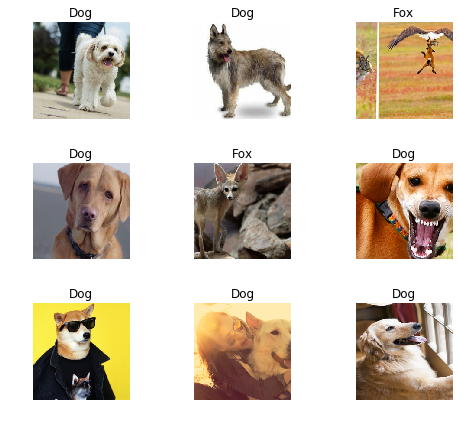

In [20]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
len(data.classes),data.c

(2, 2)

Now choose our learner model pass it our ImageDataBunch Object. here resnet34 is used beacause it is faster than resnet50

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.420622,0.116575,0.038889,00:59
1,0.228924,0.107378,0.044444,00:58
2,0.145338,0.134536,0.044444,00:58
3,0.110678,0.127596,0.044444,00:58


Now lets save this model

In [0]:
learn.save("stage-1")

Now lets create an Interpretation object to understand where our model failed for that 0.005 %



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

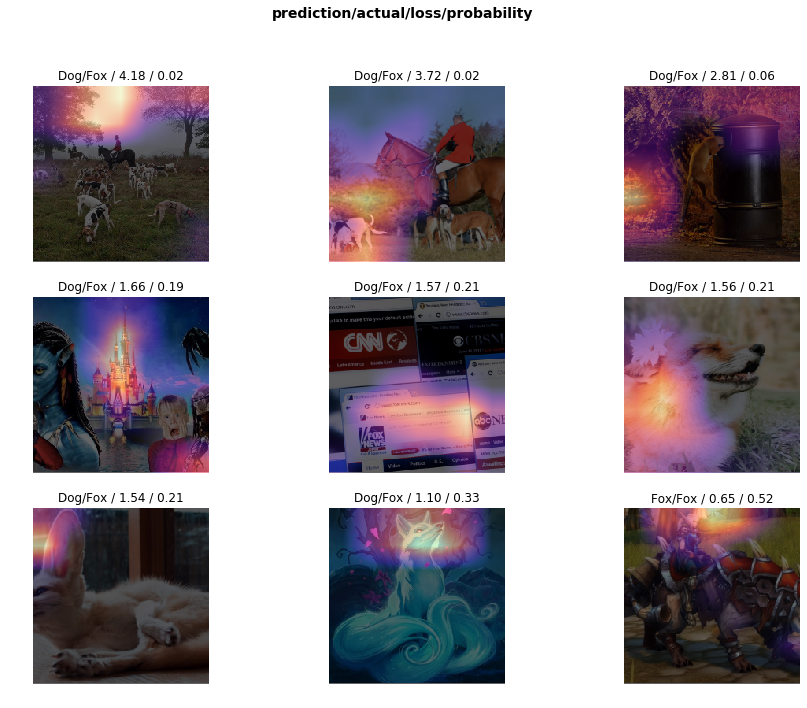

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

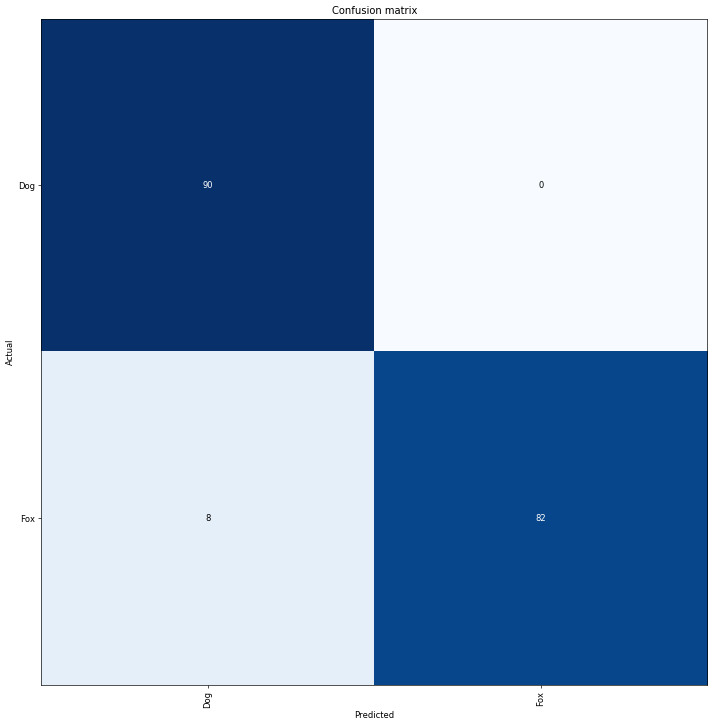

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)